# Querying Alzheimer's disease graph from DisGeNET-RDF

## BioHackathon 2023
### GOAL

Query DisGeNET-RDF to subset the graph related to all Alzheimer's disease terms and disease risk factors such as genes, and variants.

Web: https://www.disgenet.org/rdf

RDF Schema: https://www.disgenet.org/static/disgenet_ap1/images/rdf/disgenet_rdf_schema_v7.png

SPARQL endpoint: http://rdf.disgenet.org/sparql/

Query date: 28 June 2023


### Imports

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

### Functions

In [2]:
def query_to_dataframe(query_results):
    """
    Function to transform SPARQL query results into a clean list of dictionaries.
    
    query_results: A list of query results returned by SPARQLWrapper.
    return: A list of dictionaries, where each dictionary represents a result row 
    and has keys corresponding to the variables in the SPARQL SELECT clause.
    """
    new_results = []
    for result in query_results:
        new_result = {}
        for key in result:
            new_result[key] = result[key]['value']
        new_results.append(new_result)
    return new_results

### SPARQL set up

In [3]:
# access the SPARQL endpoint API
sparql = SPARQLWrapper(
    "http://rdf.disgenet.org/sparql/"
)
sparql.setReturnFormat(JSON)

## Queries

### Query Alzheimer's disease term and all its associated genes (score >= 0.4)

In [4]:
# Statistics
sparql.setQuery("""
    SELECT DISTINCT ?score ?gene
    WHERE { 
        ?gda sio:SIO_000628 ?gene,?disease ; 
            sio:SIO_000216 ?scoreIRI . 
        ?gene rdf:type ncit:C16612 ;
            dcterms:title ?geneName . 
        ?disease rdf:type ncit:C7057 ; 
            dcterms:title "Alzheimer's Disease"@en . 
        ?scoreIRI sio:SIO_000300 ?score . 
    } 
""")
try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [5]:
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q0_df = pd.DataFrame.from_dict(new_res_list)
print(q0_df.shape)
q0_df.head()

(3397, 2)


,gene,score
0,http://identifiers.org/ncbigene/10266,0.01
1,http://identifiers.org/ncbigene/11075,0.01
2,http://identifiers.org/ncbigene/245802,0.04
3,http://identifiers.org/ncbigene/140689,0.01
4,http://identifiers.org/ncbigene/79810,0.01


In [6]:
q0_df['score'].value_counts()

0.01    1549
0.02     482
0.1      453
0.03     244
0.04     149
0.05     121
0.07      53
0.06      51
0.08      48
0.3       30
0.11      27
0.09      27
0.4       23
0.12      15
0.5       14
0.6        9
0.31       8
0.2        8
0.13       8
0.7        7
0.21       6
0.17       5
0.14       5
0.33       5
0.24       4
0.26       4
0.32       4
0.35       3
0.23       3
0.16       3
0.29       2
0.34       2
0.36       2
0.22       2
0.9        2
0.42       2
0.44       1
0.57       1
0.53       1
0.18       1
0.19       1
0.15       1
0.38       1
0.56       1
0.45       1
0.39       1
0.52       1
0.43       1
0.49       1
0.54       1
0.25       1
0.68       1
0.28       1
Name: score, dtype: int64

Text(0, 0.5, 'Number of genes')

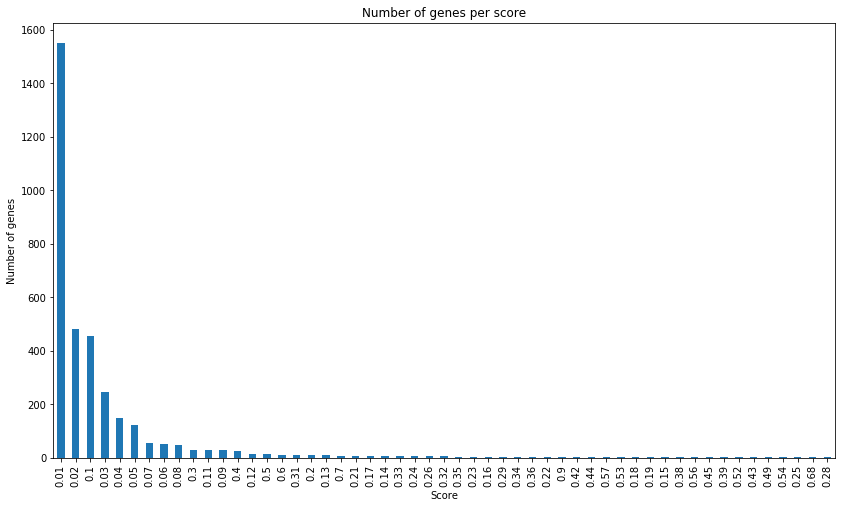

In [7]:
ax=q0_df['score'].value_counts().plot(kind='bar',
                                   figsize=(14,8),
                                   title="Number of genes per score"
                                  )
ax.set_xlabel("Score")
ax.set_ylabel("Number of genes")

In [8]:
# Query score >= 0.4
sparql.setQuery("""
    SELECT DISTINCT ?gene str(?geneName) as ?name ?score 
    WHERE { 
        ?gda sio:SIO_000628 ?gene,?disease ; 
            sio:SIO_000216 ?scoreIRI . 
        ?gene rdf:type ncit:C16612 ;
            dcterms:title ?geneName . 
        ?disease rdf:type ncit:C7057 ; 
            dcterms:title "Alzheimer's Disease"@en . 
        ?scoreIRI sio:SIO_000300 ?score . 
        FILTER (?score >= 0.4) 
    } ORDER BY DESC(?score) 
""")
try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [9]:
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q1_df = pd.DataFrame.from_dict(new_res_list)
print(q1_df.shape)
q1_df.head()

(67, 3)


,gene,name,score
0,http://identifiers.org/ncbigene/1636,angiotensin I converting enzyme,0.9
1,http://identifiers.org/ncbigene/351,amyloid beta precursor protein,0.9
2,http://identifiers.org/ncbigene/102,ADAM metallopeptidase domain 10,0.7
3,http://identifiers.org/ncbigene/3077,homeostatic iron regulator,0.7
4,http://identifiers.org/ncbigene/4137,microtubule associated protein tau,0.7


### Query Alzheimer's disease term and all its associated variants (score >= 0.4), and their associated genes (if any)

In [10]:
# Statistics
sparql.setQuery("""
    SELECT distinct 
    ?variant
    ?score
    WHERE {
        ?vda sio:SIO_000628 ?variant,?disease;
            sio:SIO_000216 ?scoreIRI .
        ?scoreIRI sio:SIO_000300 ?score .
        ?disease a ncit:C7057 ;
            dcterms:title "Alzheimer's Disease"@en .
        ?variant a ?type .
        FILTER (?type!=so:0001060)
    }
""")
try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [11]:
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q0_df = pd.DataFrame.from_dict(new_res_list)
print(q0_df.shape)
q0_df.head()

(5178, 2)


,score,variant
0,0.01,http://identifiers.org/ncbigene/10266
1,0.01,http://identifiers.org/ncbigene/11075
2,0.04,http://identifiers.org/ncbigene/245802
3,0.01,http://identifiers.org/ncbigene/140689
4,0.01,http://identifiers.org/ncbigene/79810


In [12]:
q0_df['score'].value_counts()

0.01    2196
0.7      701
0.02     581
0.1      470
0.03     282
0.04     167
0.05     129
0.8      105
0.06      62
0.07      59
0.08      57
0.09      32
0.3       31
0.11      28
0.4       24
0.12      16
0.71      15
0.5       15
0.9       12
0.81      11
0.72      10
0.6       10
0.31       9
0.13       9
0.2        9
0.82       7
0.21       7
0.83       7
0.17       6
0.14       6
        ... 
0.73       3
0.29       3
0.34       3
0.42       3
0.84       3
0.88       3
0.36       3
0.76       3
0.22       3
0.28       2
0.38       2
0.44       2
0.85       2
0.45       2
0.25       2
0.49       2
0.18       2
0.19       2
0.68       2
0.53       2
0.57       2
0.56       2
0.54       2
0.86       2
0.39       2
0.52       2
0.89       2
0.43       2
0.79       2
0.15       2
Name: score, Length: 68, dtype: int64

Text(0, 0.5, 'Number of variants')

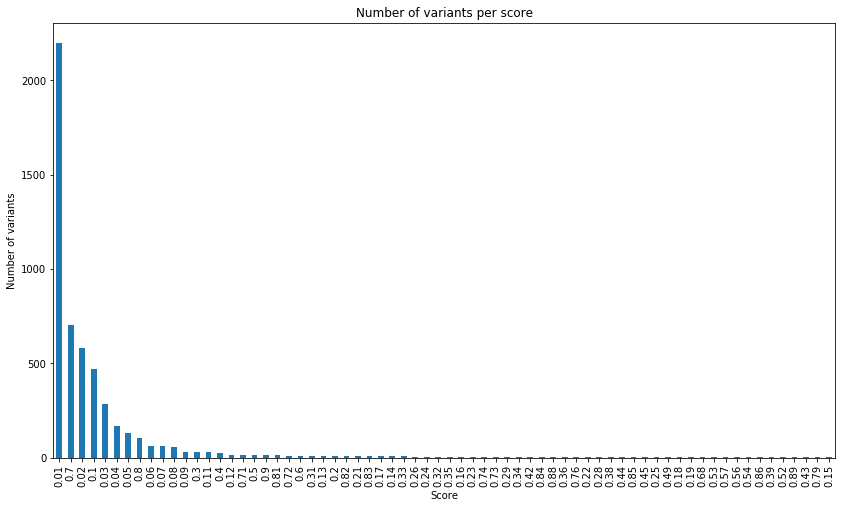

In [13]:
ax=q0_df['score'].value_counts().plot(kind='bar',
                                   figsize=(14,8),
                                   title="Number of variants per score"
                                  )
ax.set_xlabel("Score")
ax.set_ylabel("Number of variants")

In [14]:
# Query score >= 0.4
sparql.setQuery("""
    SELECT distinct 
    ?variant
    str(?variantTitle) as ?variantName
    ?gene
    str(?geneTitle) as ?geneName
    str(?refValue) as ?refAllele
    str(?altValue) as ?altAllele
    ?type as ?variantType
    ?score
    WHERE {
        ?vda sio:SIO_000628 ?variant,?disease;
            sio:SIO_000216 ?scoreIRI .
        ?scoreIRI sio:SIO_000300 ?score .
        ?disease a ncit:C7057 ;
            dcterms:title "Alzheimer's Disease"@en .
        ?variant a ?type .
        ?variant dcterms:title ?variantTitle .
        ?variant sio:SIO_000223 ?ref,?alt .
        ?ref a geno:0000152 ;
            sio:SIO_000300 ?refValue .
        ?alt a geno:0000476 ;
            sio:SIO_000300 ?altValue .
        FILTER (?type!=so:0001060)
        FILTER (?score >=0.4)
        OPTIONAL {
            ?variant so:associated_with ?gene .
            ?gene a ncit:C16612 .
            ?gene dcterms:title ?geneTitle
        }
    }
    ORDER BY DESC(?score)
""")
try:
    res = sparql.queryAndConvert()
except Exception as e:
    print(e)

In [15]:
# query results to clean dataframe
res_list = res["results"]["bindings"]
new_res_list = query_to_dataframe(res_list)
q2_df = pd.DataFrame.from_dict(new_res_list)
print(q2_df.shape)

(1869, 8)


In [16]:
# format cell values
q2_df.columns

Index(['altAllele', 'gene', 'geneName', 'refAllele', 'score', 'variant',
       'variantName', 'variantType'],
      dtype='object')

In [17]:
q2_df = q2_df[['variant','variantName', 'variantType',
               'refAllele','altAllele','gene', 'geneName','score']]
print(q2_df.shape)
q2_df.head()

(1869, 8)


,variant,variantName,variantType,refAllele,altAllele,gene,geneName,score
0,http://identifiers.org/dbsnp/rs2075650,rs2075650,http://purl.obolibrary.org/obo/SO_0001627,A,G,http://identifiers.org/ncbigene/107984619,uncharacterized LOC107984619,0.9
1,http://identifiers.org/dbsnp/rs3764650,rs3764650,http://purl.obolibrary.org/obo/SO_0001627,T,G,http://identifiers.org/ncbigene/10347,ATP binding cassette subfamily A member 7,0.9
2,http://identifiers.org/dbsnp/rs2075650,rs2075650,http://purl.obolibrary.org/obo/SO_0001627,A,G,http://identifiers.org/ncbigene/10452,translocase of outer mitochondrial membrane 40,0.9
3,http://identifiers.org/dbsnp/rs3764650,rs3764650,http://purl.obolibrary.org/obo/SO_0001627,T,G,http://identifiers.org/ncbigene/1749,distal-less homeobox 5,0.9
4,http://identifiers.org/dbsnp/rs75932628,rs75932628,http://purl.obolibrary.org/obo/SO_0001583,C,A,http://identifiers.org/ncbigene/54209,triggering receptor expressed on myeloid cells 2,0.9
